# South Asian Yearly OMI Fishnet

# Importing the dependecies

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import shapely
import geopandas as gpd
from shapely.geometry import Point, Polygon, MultiPolygon
from geopandas import GeoDataFrame
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from shapely import wkt
import seaborn as sns
from tqdm import tqdm
from pyproj import Geod
geod = Geod(ellps="WGS84")


from shapely import wkt
from tqdm.notebook import tqdm
tqdm.pandas()

from matplotlib import rc, rcParams
rc('font', weight='normal')

In [4]:
import dask.dataframe as dd
import dask_geopandas
import dask

# Getting maps for south asian countries only

In [5]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [6]:
south_asia = gpd.GeoDataFrame({'geometry': [Polygon([(70, -25), (50, 80), (150, 80), (150, -25)])]}).set_geometry('geometry')
south_asia.crs = 'EPSG:4326'
south_asia = gpd.sjoin(world, south_asia, predicate = 'within')
south_asia = south_asia[south_asia.name.isin(['Nepal', 'Bangladesh', 'Bhutan', 'China', 'India', 'Maldives', 'Sri Lanka', 'Pakistan'])]

<AxesSubplot: >

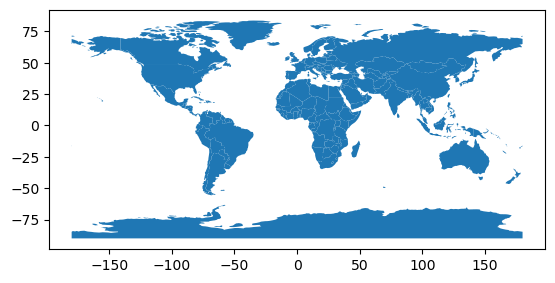

In [7]:
world.plot()

In [8]:
south_asia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,index_right
98,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",0
99,1.630462e+08,Asia,Bangladesh,BGD,302571,"POLYGON ((92.67272 22.04124, 92.65226 21.32405...",0
100,7.630920e+05,Asia,Bhutan,BTN,2530,"POLYGON ((91.69666 27.77174, 92.10371 27.45261...",0
101,2.860871e+07,Asia,Nepal,NPL,30641,"POLYGON ((88.12044 27.87654, 88.04313 27.44582...",0
102,2.165653e+08,Asia,Pakistan,PAK,278221,"POLYGON ((77.83745 35.49401, 76.87172 34.65354...",0
138,2.180300e+07,Asia,Sri Lanka,LKA,84008,"POLYGON ((81.78796 7.52306, 81.63732 6.48178, ...",0
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",0


<AxesSubplot: >

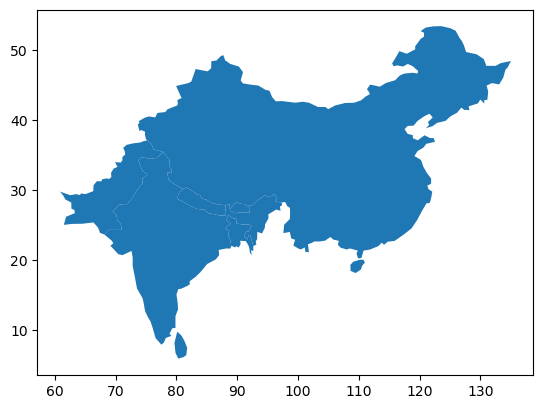

In [9]:
south_asia.plot() # india, china ,nepal, maldives, bangladesh, bhutan, srilank 

# Loading Internal Divisions and capital city for Each Country

<AxesSubplot: >

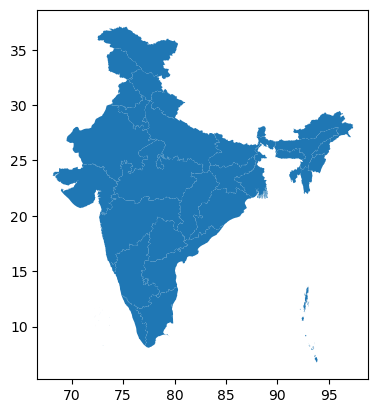

In [10]:
india = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\Countries\India\India_State_Shapefile\India_State_Shapefile\India_State_Boundary.shp")
india.crs = 'EPSG:4326'
india.plot()

In [11]:
bangladesh = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\Countries\Bangladesh\Shape_Files\polbnda_bgd.shp")

<AxesSubplot: >

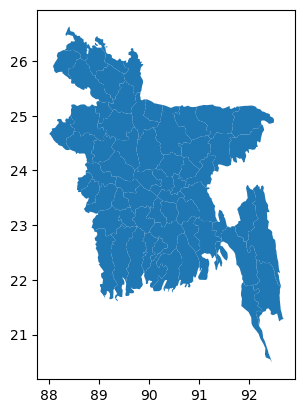

In [12]:
bangladesh.crs = 'EPSG:4326'
bangladesh.plot()

In [25]:
nepal = gpd.read_file(r"E:\Dr. Shreeram Sharma\Shreeram Sir\Nov 2021 to Jun 2022\Aerosol\Shape_Files\hermes_NPL_new_wgs_0.shp")

In [27]:
nepal.to_file("NEPAL_OUTSIDEBOUNDARY.shp")

In [14]:
nepal.crs = 'EPSG:4326'

<AxesSubplot: >

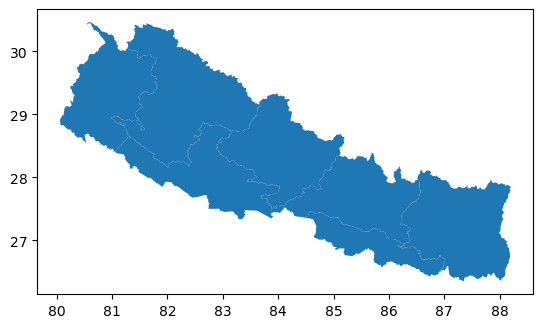

In [15]:
nepal.plot()

In [16]:
china = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\Countries\China\chn_adm_ocha_2020_shp\chn_admbnda_adm1_ocha_2020.shp")

In [17]:
china.crs = 'EPSG:4326'

<AxesSubplot: >

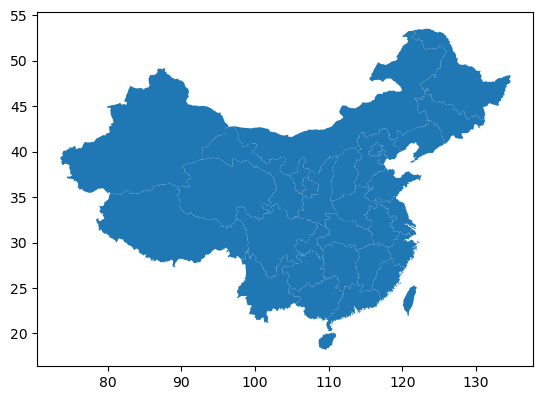

In [18]:
china.plot()

In [23]:
pakistan_only = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\Countries\Pakistan\pak_adm_wfp_20220909_shp\pak_admbnda_adm0_wfp_20220909.shp")

In [24]:
pakistan_only.to_file("pakistan_boundary.shp")

,Shape_Leng,Shape_Area,ADM0_EN,ADM0_PCODE,ADM0_REF,ADM0ALT1EN,ADM0ALT2EN,date,validOn,validTo,geometry
0,87.925272,82.027679,Pakistan,PK,None,None,None,2022-09-02,2022-09-09,None,"MULTIPOLYGON (((68.18577 23.83741, 68.19128 23..."


In [19]:
pakistan = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\Countries\Pakistan\pak_adm_wfp_20220909_shp\pak_admbnda_adm1_wfp_20220909.shp")

In [20]:
pakistan.crs = 'EPSG:4326'

<AxesSubplot: >

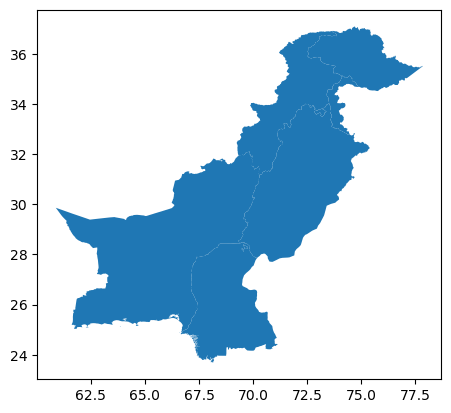

In [21]:
pakistan.plot()

In [22]:
srilanka = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\Countries\Sri Lanka\lka_adm_20220816_shp\lka_admbnda_adm1_slsd_20220816.shp")

In [23]:
srilanka.crs = 'EPSG:4326'

<AxesSubplot: >

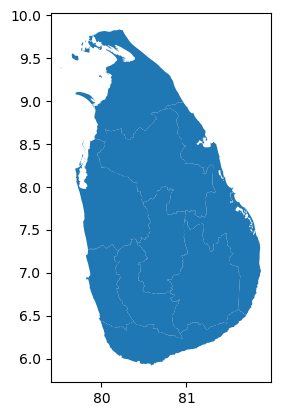

In [24]:
srilanka.plot()

In [25]:
bhutan = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\Countries\Bhutan\btn_admbnda_bnlc_20201026_shp\btn_admbnda_bnlc_20201026_SHP\btn_admbnda_adm1_bnlc_20201026.shp")

In [26]:
bhutan.crs = 'EPSG:4326'

<AxesSubplot: >

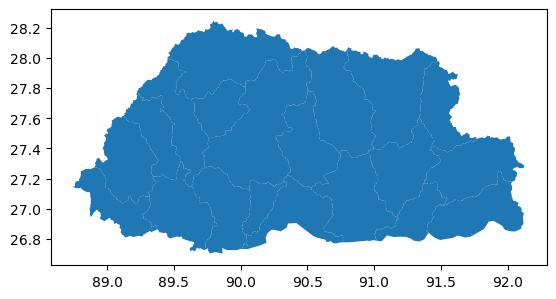

In [27]:
bhutan.plot()

In [28]:
# concatenating maps for each of the SAARC countires

south_asia_regions = gpd.GeoDataFrame(pd.concat([india, bangladesh, nepal, china, pakistan, srilanka, bhutan]))

<AxesSubplot: >

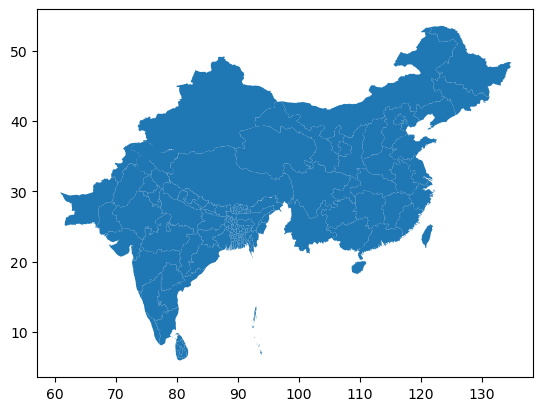

In [29]:
south_asia_regions.plot()

# Loading Capital Cities for Each Country

In [10]:
# Create dataframe with city coordinates
capitals = pd.DataFrame({
    'City': ['Kathmandu', 'Dhaka', 'New Delhi', 'Beijing', 'Islamabad', 'Colombo'],
    'Country': ['Nepal', 'Bangladesh', 'India', 'China', 'Pakistan', 'Sri Lanka'],
    'Longitude': [85.31, 90.40, 77.13, 116.39, 73.06, 79.85],
    'Latitude': [27.70, 23.81, 28.57, 39.90, 33.68, 6.93]
})

# Convert dataframe to geodataframe with shapely Point objects
# capitals = gpd.GeoDataFrame(
#      ['Kathmandu', 'Dhaka', 'New Delhi', 'Beijing', 'Islamabad', 'Colombo'], geometry= gpd.points_from_xy(capitals.Longitude, capitals.Latitude))
capitals['geometry'] = gpd.points_from_xy(x = capitals['Longitude'], y = capitals['Latitude'])
capitals = capitals.set_geometry('geometry')

# Create a new column to hold marker styles
capitals['marker_style'] = None

# Define marker styles
markers = ['o', 's', 'D', 'v', '^', 'p']

# Set marker style for each city based on its country
for i, country in enumerate(capitals.Country.unique()):
    capitals.loc[capitals.Country == country, 'marker_style'] = markers[i]

In [11]:
capitals

,City,Country,Longitude,Latitude,geometry,marker_style
0,Kathmandu,Nepal,85.31,27.70,POINT (85.31000 27.70000),o
1,Dhaka,Bangladesh,90.40,23.81,POINT (90.40000 23.81000),s
2,New Delhi,India,77.13,28.57,POINT (77.13000 28.57000),D
3,Beijing,China,116.39,39.90,POINT (116.39000 39.90000),v
4,Islamabad,Pakistan,73.06,33.68,POINT (73.06000 33.68000),^
5,Colombo,Sri Lanka,79.85,6.93,POINT (79.85000 6.93000),p


# Loading Averaged Shapefile and Plotting

<b> Note: After concatenating the shapefiles using the code above, you should create gridded fishnet from `Creating_Fridded_Polygons` folder and perform averaging using the code from `TropOmi Extraction and Plotting Guide` folder.

In [13]:
%%time

fishnet_x = gpd.read_file(r"C:\Users\Lenovo\Desktop\Satellite\SouthAsiaNO2_Paper\Averaged_Shapefile\NEW_SOUTH_ASIA_AVERAGED_OMI.shp")

CPU times: total: 11.5 s
Wall time: 12.2 s


In [14]:
fishnet_x.columns

Index(['ID', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021',
       '2022', 'geometry'],
      dtype='object')

In [15]:
# setting the minimum and maximum values for the plot's legend
vmin = 1e+15 
vmax = 4e+15

In [16]:
# you can play around with these values

alpha = 1
cmap = 'jet'
n_rows = 5
n_cols = 4

0it [00:00, ?it/s]

column:  2005
column:  2006
column:  2007
column:  2008
column:  2009
column:  2010
column:  2011
column:  2012
column:  2013
column:  2014
column:  2015
column:  2016
column:  2017
column:  2018
column:  2019
column:  2020
column:  2021
column:  2022
CPU times: total: 8min 36s
Wall time: 9min 48s


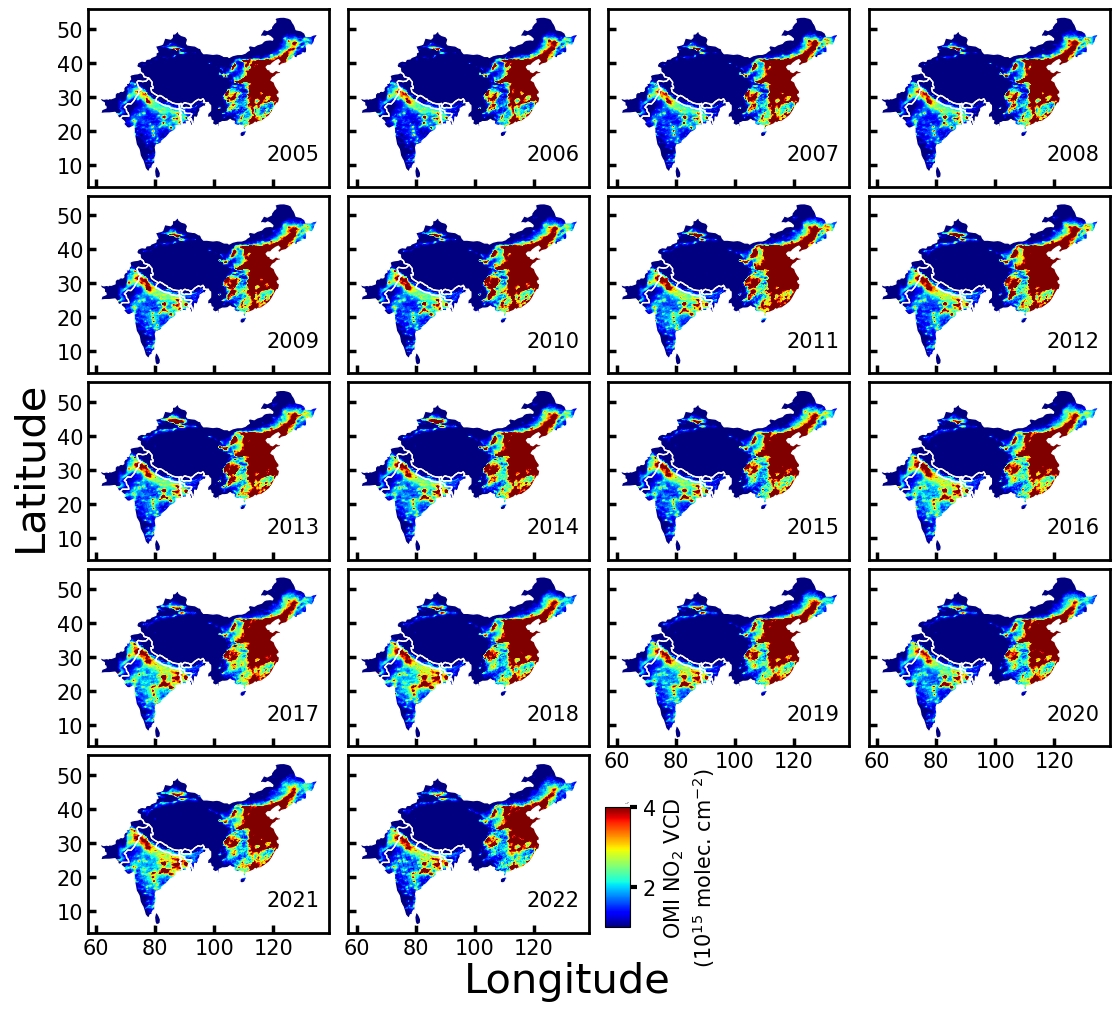

In [21]:
%%time

fig, axes = plt.subplots(5, 4, figsize=(25, 12), constrained_layout=False)
plt.rcParams.update({'font.size': 15}) # legend ko title ko size


for index, column in tqdm(enumerate(range(2005, 2023))):
    print("column: ", column)

    ax = plt.subplot(5, 4, index+1)

    fishnet_x.plot(ax= ax, column = str(column), cmap = cmap,linewidth = 0,alpha = alpha, edgecolor = 'black',legend = False, 
                   missing_kwds = dict(color='grey', label='No Data'),
                    markersize = 10, vmin =  vmin, vmax = vmax)

    ax2 = south_asia.geometry.boundary.plot(ax = ax, edgecolor = 'white', alpha = 1, linewidth = 1)
    
    plt.text(0.85, 0.15, column,
        horizontalalignment='center',
        fontsize=15, fontweight = 'normal', 
        
        transform = ax.transAxes)
    
    ax.yaxis.set_tick_params(labelsize=15)
    ax.xaxis.set_tick_params(labelsize=15)

    # ax.tick_params(labelsize=40)
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black') 
    ax.spines['right'].set_color('black')
    ax.spines['right'].set_linewidth(2)
    ax.spines['top'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.spines['left'].set_color('black')
    ax.spines['left'].set_lw(2) 
    ax.tick_params(which='both', width=2.5)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=8)
    ax.tick_params(which = 'both', direction = 'in')

    ax.yaxis.set_major_locator(plt.MaxNLocator(6))
    ax.xaxis.set_major_locator(plt.MaxNLocator(5))


    if index+1 not in [1, 5, 9, 13, 17]:
        plt.setp(ax.get_yticklabels(), visible=False)

    if index+1 not in [15, 16, 17, 18]:
        plt.setp(ax.get_xticklabels(), visible=False)    
    

axes.flat[-2].set_visible(False)    
axes.flat[-1].set_visible(False)

plt.subplots_adjust(wspace = -0.775, hspace = 0.05)
cax = plt.axes([0.515, 0.115, 0.01, 0.1])
sm = plt.cm.ScalarMappable(cmap= cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm, cax=cax,orientation='vertical')#, extend='both')
cbar.set_label('OMI NO$_2$ VCD \n($10^{15}$ molec. $\mathregular{cm^{-2}}$)', fontsize = 15, labelpad = 5, fontweight = 'normal')
cbar.ax.tick_params(length=5, width=3, which="major",  direction = 'out', labelright=True)
cbar.set_alpha(alpha)
cbar.draw_all()
cbar.formatter.set_useMathText(True)
t = cbar.ax.yaxis.get_offset_text()
t.set_size(0)

fig.text(0.5, 0.07, 'Longitude', ha='center', va='center', fontsize = 30)
fig.text(0.285, 0.5, 'Latitude', ha='center', \
         va='center', rotation='vertical', fontsize = 30)


# plt.savefig('2SOUTHASIA_FISHNET_PLOT.jpg', bbox_inches='tight', dpi=1000)

In [180]:
from tqdm import tqdm

In [192]:
# south_asia_regions[['Name','geometry','Type']].to_file("SouthAsia_InternalDivisions.shp")

In [197]:
# south_asia.to_file("SouthAsia_Countries.shp")

In [198]:
# capitals.to_file("SouthAsia_Capitals.shp")

100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:03<00:00,  1.76it/s]


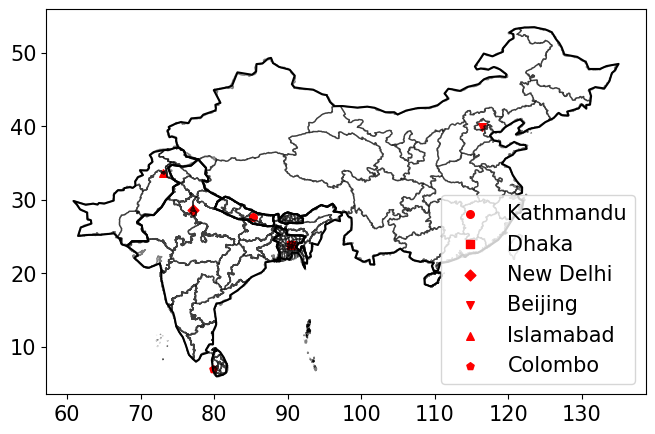

In [187]:
fig, axes = plt.subplots(1, 4, figsize=(10, 5), constrained_layout=False)
plt.rcParams.update({'font.size': 15}) # legend ko title ko size

ax = plt.subplot(1, 1, 1)
ax = plt.subplot()
south_asia_regions.geometry.boundary.plot(ax = ax, edgecolor = 'black', alpha = 0.5, linewidth = 1)
ax2 = south_asia.geometry.boundary.plot(ax = ax, edgecolor = 'black', alpha = 1, linewidth = 1.5)

for i in tqdm(range(capitals.shape[0])):
    temp = capitals.loc[[i]]
    
    temp.plot(column='City', color='red', ax=ax, marker=temp.marker_style.values[0], \
             label = temp.City.values[0], markersize = 30, alpha = 1)
    # plt.annotate(temp.City.values[0], (temp.geometry.x, temp.geometry.y), xytext=(0, 0), fontsize = 10,textcoords='offset points', ha='left', va='bottom')

ax.legend()
plt.show()

0it [00:00, ?it/s]

column:  2005
column:  2006
column:  2007
column:  2008
column:  2009
column:  2010
column:  2011
column:  2012
column:  2013
column:  2014
column:  2015
column:  2016
column:  2017
column:  2018
column:  2019
column:  2020
column:  2021
column:  2022
CPU times: total: 5.73 s
Wall time: 6.65 s


Text(0.25, 0.5, 'Latitude')

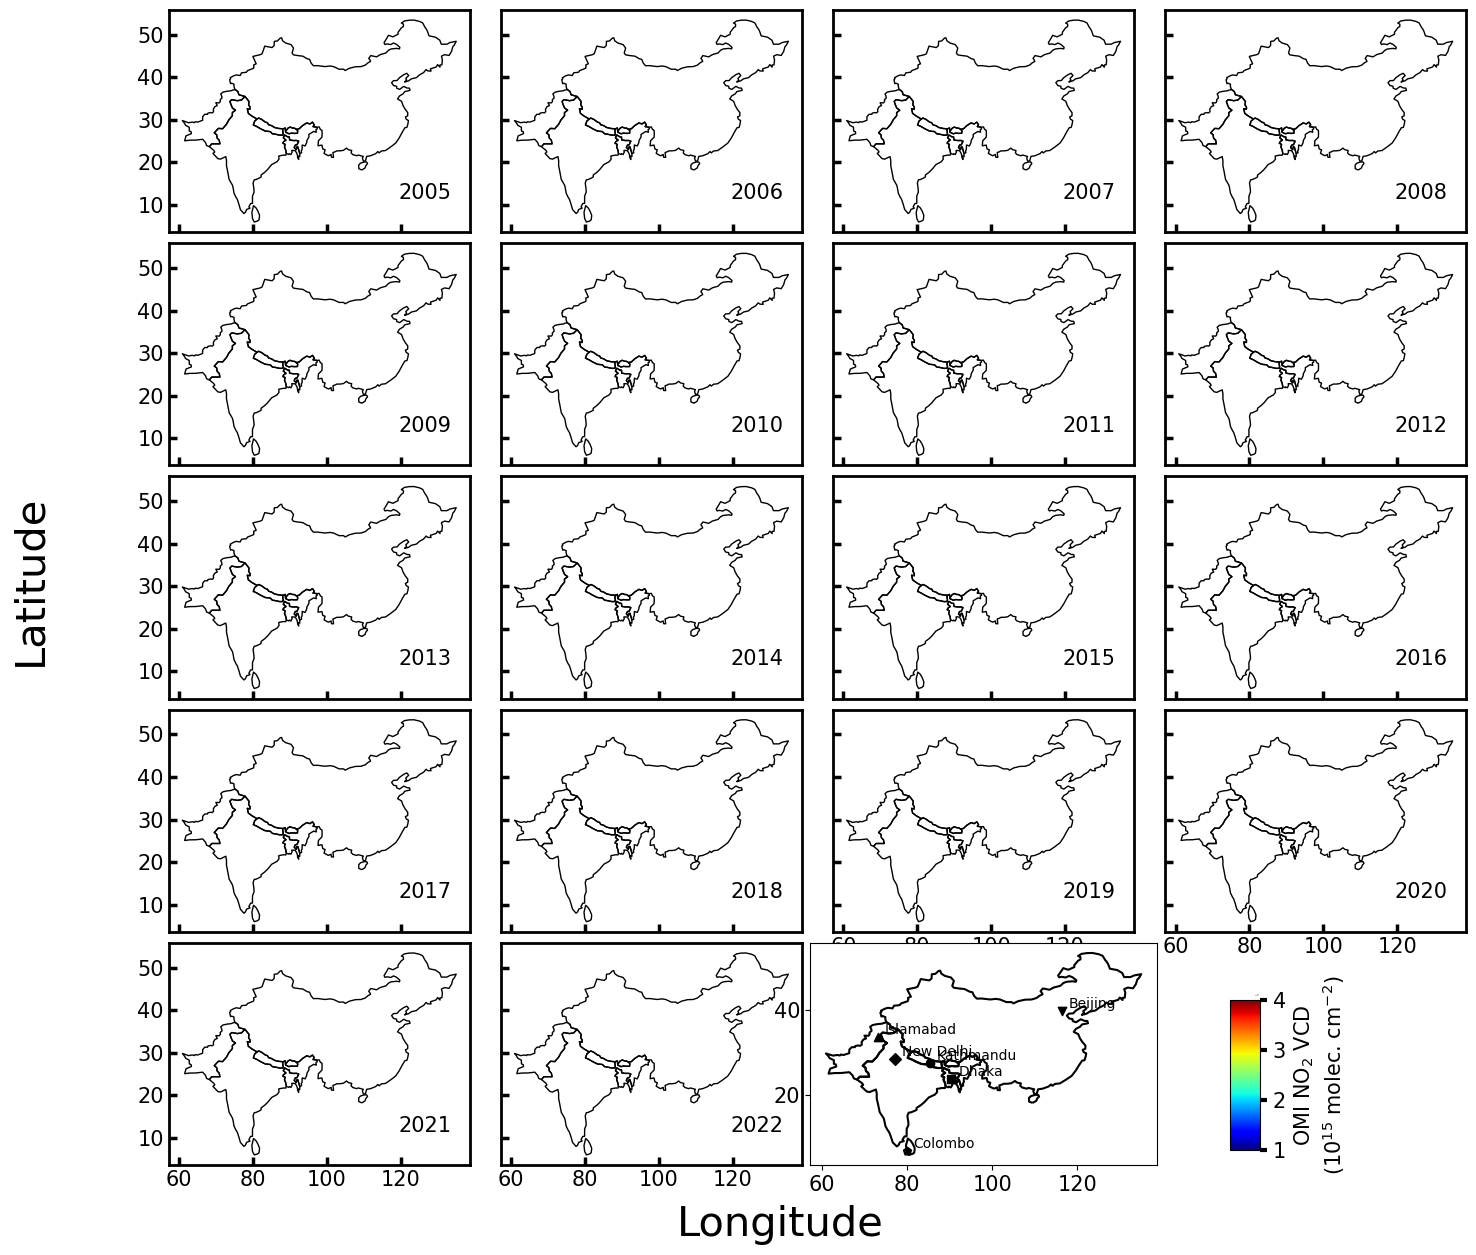

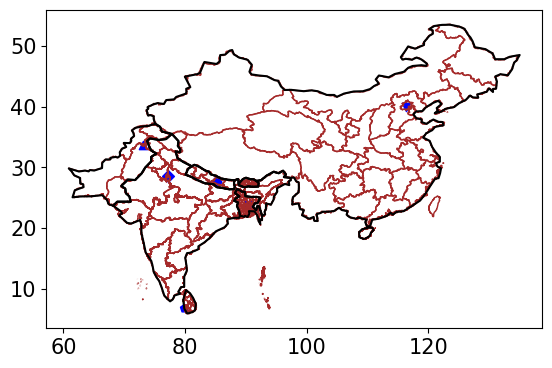

In [164]:
ax = plt.subplot()
south_asia_regions.geometry.boundary.plot(ax = ax, edgecolor = 'brown', alpha = 1, linewidth = 1)
ax2 = south_asia.geometry.boundary.plot(ax = ax, edgecolor = 'black', alpha = 1, linewidth = 1.5)

for i in range(capitals.shape[0]):
    temp = capitals.loc[[i]]
    
    temp.plot(column='City', color='blue', ax=ax, marker=temp.marker_style.values[0], \
             label = temp.City.values[0])
    # plt.annotate(temp.City.values[0], (temp.geometry.x, temp.geometry.y), xytext=(0, 0), fontsize = 10,textcoords='offset points', ha='left', va='bottom')

    
plt.show()